Model Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54


--- Top Risk Factors ---
oldpeak                    0.138002
chest_pain_type            0.133470
thal                       0.114730
max_heart_rate             0.105259
age                        0.095171
major_vessels_count        0.085092
serum_cholestoral          0.083485
resting_blood_pressure     0.079547
st_slope                   0.059689
exercise_induced_angina    0.052720
sex                        0.025117
resting_ecg                0.018442
fasting_blood_sugar        0.009276
dtype: float64


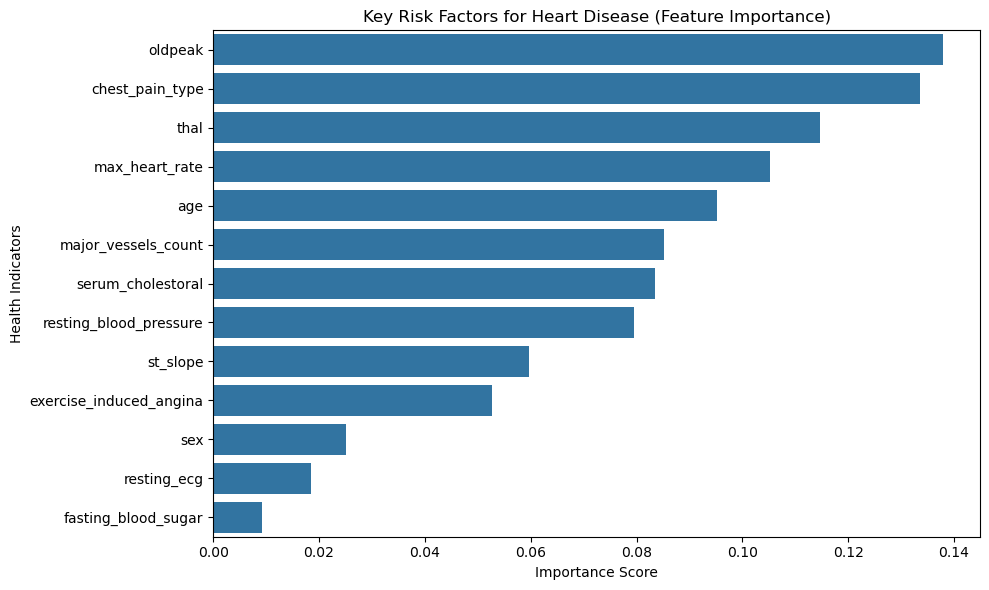

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('heart.csv')

# Preprocessing
# 1. Drop Serial No
df_ml = df.drop(columns=['Serial No'])

# 2. Map heart_disease: 1 -> 0 (No Risk), 2 -> 1 (Risk)
# Based on common UCI Heart Disease dataset structure
df_ml['heart_disease'] = df_ml['heart_disease'].map({1: 0, 2: 1})

# Define features and target
X = df_ml.drop(columns=['heart_disease'])
y = df_ml['heart_disease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Feature Importance for Explainability
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Key Risk Factors for Heart Disease (Feature Importance)")
plt.xlabel("Importance Score")
plt.ylabel("Health Indicators")
plt.tight_layout()
plt.savefig('heart_feature_importance.png')

# Output feature importance as a table for the response
print("\n--- Top Risk Factors ---")
print(feature_importances)

# Save the model summary/performance to a file to mention it
performance_df = pd.DataFrame({'Accuracy': [accuracy], 'Details': ['Random Forest Classifier']})
performance_df.to_csv('heart_model_performance.csv', index=False)

Diabetes Model Accuracy: 0.99

Diabetes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104


--- Top Diabetes Risk Factors ---
Polyuria              0.234835
Polydipsia            0.175321
Gender                0.103399
Age                   0.099789
sudden weight loss    0.054346
partial paresis       0.048371
Alopecia              0.044270
Irritability          0.043548
delayed healing       0.032086
Itching               0.029481
Genital thrush        0.027175
visual blurring       0.024657
Polyphagia            0.023403
weakness              0.023325
muscle stiffness      0.021751
Obesity               0.014244
dtype: float64


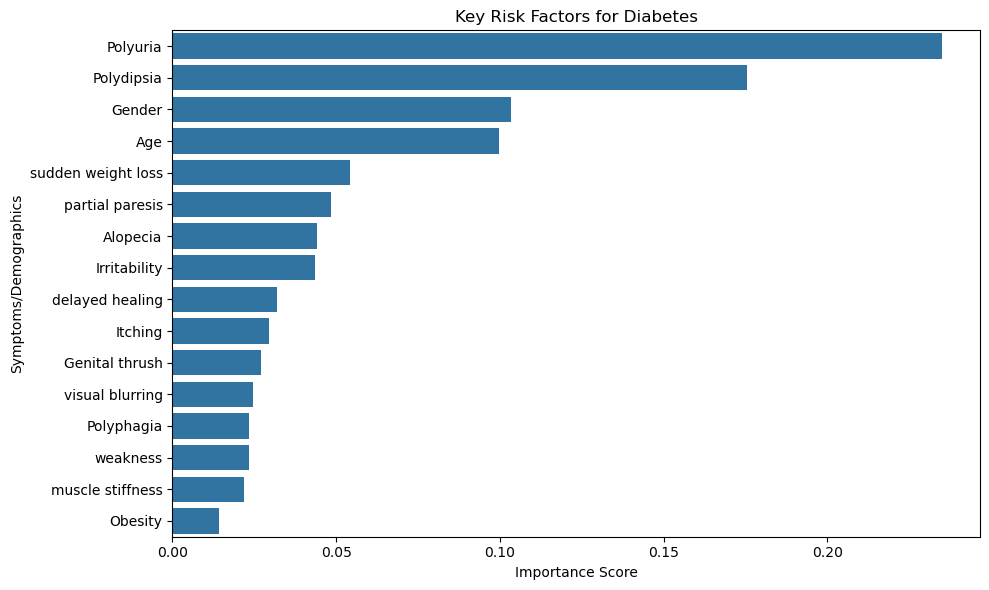

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load diabetes data
diabetes_df = pd.read_csv('diabetes_data_upload.csv')

# Preprocessing: Convert categorical strings to numbers
# Yes/No -> 1/0, Male/Female -> 1/0, Positive/Negative -> 1/0
diabetes_processed = diabetes_df.copy()

# Mapping binary features
binary_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
               'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
               'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

for col in binary_cols:
    diabetes_processed[col] = diabetes_processed[col].map({'Yes': 1, 'No': 0})

diabetes_processed['Gender'] = diabetes_processed['Gender'].map({'Male': 1, 'Female': 0})
diabetes_processed['class'] = diabetes_processed['class'].map({'Positive': 1, 'Negative': 0})

# Define features and target
X_d = diabetes_processed.drop(columns=['class'])
y_d = diabetes_processed['class']

# Split data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

# Train Random Forest for Diabetes
rf_diabetes = RandomForestClassifier(n_estimators=100, random_state=42)
rf_diabetes.fit(X_train_d, y_train_d)

# Evaluation
y_pred_d = rf_diabetes.predict(X_test_d)
accuracy_d = accuracy_score(y_test_d, y_pred_d)
report_d = classification_report(y_test_d, y_pred_d)

print(f"Diabetes Model Accuracy: {accuracy_d:.2f}")
print("\nDiabetes Classification Report:")
print(report_d)

# Feature Importance for Diabetes
feat_importances_d = pd.Series(rf_diabetes.feature_importances_, index=X_d.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_d, y=feat_importances_d.index)
plt.title("Key Risk Factors for Diabetes")
plt.xlabel("Importance Score")
plt.ylabel("Symptoms/Demographics")
plt.tight_layout()
plt.savefig('diabetes_feature_importance.png')

print("\n--- Top Diabetes Risk Factors ---")
print(feat_importances_d)

# Save diabetes summary
diabetes_perf = pd.DataFrame({'Accuracy': [accuracy_d], 'Details': ['Random Forest Classifier']})
diabetes_perf.to_csv('diabetes_model_performance.csv', index=False)

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import joblib

# 1. Prepare Heart Model
heart_df = pd.read_csv('heart.csv').drop(columns=['Serial No'])
heart_df['heart_disease'] = heart_df['heart_disease'].map({1: 0, 2: 1})
X_h = heart_df.drop(columns=['heart_disease'])
y_h = heart_df['heart_disease']
heart_model = RandomForestClassifier(n_estimators=100, random_state=42)
heart_model.fit(X_h, y_h)

# 2. Prepare Diabetes Model
diabetes_df = pd.read_csv('diabetes_data_upload.csv')
diabetes_processed = diabetes_df.copy()
binary_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
               'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
               'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
for col in binary_cols:
    diabetes_processed[col] = diabetes_processed[col].map({'Yes': 1, 'No': 0})
diabetes_processed['Gender'] = diabetes_processed['Gender'].map({'Male': 1, 'Female': 0})
diabetes_processed['class'] = diabetes_processed['class'].map({'Positive': 1, 'Negative': 0})
X_d = diabetes_processed.drop(columns=['class'])
y_d = diabetes_processed['class']
diabetes_model = RandomForestClassifier(n_estimators=100, random_state=42)
diabetes_model.fit(X_d, y_d)

def integrated_health_assessment(patient_data):
    """
    Takes patient data dictionary, splits it for relevant models, 
    and returns a combined risk assessment.
    """
    # Extract Heart Features
    h_features = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                  'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg', 
                  'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 
                  'st_slope', 'major_vessels_count', 'thal']
    heart_input = pd.DataFrame([[patient_data.get(f, 0) for f in h_features]], columns=h_features)
    heart_prob = heart_model.predict_proba(heart_input)[0][1]
    
    # Extract Diabetes Features
    d_features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 
                  'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 
                  'Itching', 'Irritability', 'delayed healing', 'partial paresis', 
                  'muscle stiffness', 'Alopecia', 'Obesity']
    # Mapping for diabetes model (Assumes patient_data uses model-friendly 1/0 values)
    diabetes_input = pd.DataFrame([[patient_data.get(f, 0) for f in d_features]], columns=d_features)
    diabetes_prob = diabetes_model.predict_proba(diabetes_input)[0][1]
    
    # Personalized Insights Generation
    insights = []
    if heart_prob > 0.5:
        insights.append("High Heart Risk: Consider reducing cholesterol and monitoring blood pressure.")
    if diabetes_prob > 0.5:
        insights.append("High Diabetes Risk: Monitor blood sugar levels; Polyuria/Polydipsia detected.")
    if patient_data.get('Obesity', 0) == 1 and (heart_prob > 0.3 or diabetes_prob > 0.3):
        insights.append("Combined Risk: Obesity is significantly impacting your metabolic and cardiac health.")
    
    return {
        "Heart Disease Risk": f"{heart_prob:.1%}",
        "Diabetes Risk": f"{diabetes_prob:.1%}",
        "Preventive Care Insights": insights
    }

# Create a sample high-risk patient profile for demonstration
sample_patient = {
    'age': 65, 'Age': 65,
    'sex': 1, 'Gender': 1, # Male
    'chest_pain_type': 4,
    'resting_blood_pressure': 150,
    'serum_cholestoral': 300,
    'max_heart_rate': 120,
    'oldpeak': 2.5,
    'Polyuria': 1,
    'Polydipsia': 1,
    'Obesity': 1,
    'weakness': 1
}

result = integrated_health_assessment(sample_patient)
print(result)

# Exporting a sample report to CSV
report_df = pd.DataFrame([result])
report_df.to_csv('integrated_health_report.csv', index=False)

{'Heart Disease Risk': '53.0%', 'Diabetes Risk': '97.0%', 'Preventive Care Insights': ['High Heart Risk: Consider reducing cholesterol and monitoring blood pressure.', 'High Diabetes Risk: Monitor blood sugar levels; Polyuria/Polydipsia detected.', 'Combined Risk: Obesity is significantly impacting your metabolic and cardiac health.']}


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Re-loading and training models for a fresh session
heart_df = pd.read_csv('heart.csv').drop(columns=['Serial No'])
heart_df['heart_disease'] = heart_df['heart_disease'].map({1: 0, 2: 1})
X_h = heart_df.drop(columns=['heart_disease'])
y_h = heart_df['heart_disease']
heart_model = RandomForestClassifier(n_estimators=100, random_state=42)
heart_model.fit(X_h, y_h)

diabetes_df = pd.read_csv('diabetes_data_upload.csv')
diabetes_processed = diabetes_df.copy()
binary_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
               'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
               'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
for col in binary_cols:
    diabetes_processed[col] = diabetes_processed[col].map({'Yes': 1, 'No': 0})
diabetes_processed['Gender'] = diabetes_processed['Gender'].map({'Male': 1, 'Female': 0})
diabetes_processed['class'] = diabetes_processed['class'].map({'Positive': 1, 'Negative': 0})
X_d = diabetes_processed.drop(columns=['class'])
y_d = diabetes_processed['class']
diabetes_model = RandomForestClassifier(n_estimators=100, random_state=42)
diabetes_model.fit(X_d, y_d)

def generate_personalized_recommendations(patient_data, heart_prob, diabetes_prob):
    recs = []
    # Heart Recommendations based on feature values
    if patient_data.get('resting_blood_pressure', 0) > 140:
        recs.append("Cardiac: Your blood pressure is high. Suggest adopting the DASH diet and reducing sodium intake.")
    if patient_data.get('serum_cholestoral', 0) > 240:
        recs.append("Cardiac: High cholesterol detected. Recommend a diet low in saturated fats and increased physical activity.")
    if patient_data.get('oldpeak', 0) > 2.0:
        recs.append("Cardiac: Significant ST depression noted. Recommend a specialist cardiovascular stress test.")
    
    # Diabetes Recommendations
    if patient_data.get('Polyuria', 0) == 1 or patient_data.get('Polydipsia', 0) == 1:
        recs.append("Metabolic: Presence of excessive urination/thirst. Suggest an immediate HbA1c blood sugar test.")
    if patient_data.get('Obesity', 0) == 1:
        recs.append("Metabolic: BMI indicates obesity. Recommend a weight management program to lower insulin resistance.")
        
    # Risk-level logic
    if heart_prob > 0.7:
        recs.append("Urgent: High probability of existing heart condition. Consult a cardiologist immediately.")
    if diabetes_prob > 0.7:
        recs.append("Urgent: High probability of diabetes. Consult an endocrinologist.")
        
    return recs

def assess_patient(name, data):
    # Prepare Heart Input
    h_features = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral', 
                  'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 
                  'oldpeak', 'st_slope', 'major_vessels_count', 'thal']
    h_input = pd.DataFrame([[data.get(f, 0) for f in h_features]], columns=h_features)
    h_prob = heart_model.predict_proba(h_input)[0][1]
    
    # Prepare Diabetes Input
    d_features = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                  'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                  'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']
    d_input = pd.DataFrame([[data.get(f, 0) for f in d_features]], columns=d_features)
    d_prob = diabetes_model.predict_proba(d_input)[0][1]
    
    recommendations = generate_personalized_recommendations(data, h_prob, d_prob)
    
    return {
        "Patient Name": name,
        "Heart Risk": f"{h_prob:.1%}",
        "Diabetes Risk": f"{d_prob:.1%}",
        "Recommendations": " | ".join(recommendations)
    }

# Simulating a set of patients
patients = {
    "Patient A (High Both)": {
        'age': 65, 'Age': 65, 'sex': 1, 'Gender': 1, 'resting_blood_pressure': 155, 
        'serum_cholestoral': 280, 'chest_pain_type': 4, 'max_heart_rate': 110, 
        'oldpeak': 3.0, 'Polyuria': 1, 'Polydipsia': 1, 'Obesity': 1
    },
    "Patient B (High Heart Risk)": {
        'age': 55, 'Age': 55, 'sex': 1, 'Gender': 1, 'resting_blood_pressure': 160, 
        'serum_cholestoral': 310, 'chest_pain_type': 4, 'max_heart_rate': 140, 
        'oldpeak': 2.2, 'Polyuria': 0, 'Polydipsia': 0, 'Obesity': 0
    },
    "Patient C (Low Risk)": {
        'age': 30, 'Age': 30, 'sex': 0, 'Gender': 0, 'resting_blood_pressure': 115, 
        'serum_cholestoral': 190, 'chest_pain_type': 1, 'max_heart_rate': 175, 
        'oldpeak': 0.0, 'Polyuria': 0, 'Polydipsia': 0, 'Obesity': 0
    }
}

final_reports = [assess_patient(name, p) for name, p in patients.items()]
final_df = pd.DataFrame(final_reports)
final_df.to_csv('detailed_patient_reports.csv', index=False)
print(final_df[['Patient Name', 'Heart Risk', 'Diabetes Risk']])

                  Patient Name Heart Risk Diabetes Risk
0        Patient A (High Both)      61.0%         95.0%
1  Patient B (High Heart Risk)      47.0%          5.0%
2         Patient C (Low Risk)       3.0%          9.0%
